In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv("messy_data.csv", sep=', ')
df.head(10)

C:\Users\Mikołaj\AppData\Local\Temp\ipykernel_3148\545478492.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("messy_data.csv", sep=', ')


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,vvs2,E,premium,5.7,NaN,3.52,62.0,59,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56,700.0
3,1.2,if,d,ideal,NaN,6.82,4.20,61.7,58,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0
5,NaN,Si1,G,very Good,5.9,5.92,3.63,NaN,57,4200.0
6,0.5,if,D,Ideal,5.1,NaN,3.20,61.5,57,3100.0
7,0.4,Vvs1,f,good,4.8,4.79,2.95,NaN,NaN,1500.0
8,NaN,SI2,I,good,4.3,4.32,NaN,62.3,",",NaN
9,1.0,vvs1,F,Ideal,6.4,NaN,4.00,NaN,58,7500.0


In [47]:
df.dtypes

carat          float64
clarity         object
color           object
cut             object
x dimension    float64
y dimension    float64
z dimension    float64
depth          float64
table           object
price          float64
dtype: object

In [48]:
sum(df.duplicated())
#Ponieważ suma wynosi 0, wiemy że nie ma duplikatów

0

In [49]:
df.isna().sum()

carat          50
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    48
depth          67
table          32
price           4
dtype: int64

In [50]:
df.clarity = df.clarity.str.upper()
df.color = df.color.str.title()
df.cut = df.cut.str.title()
df.head(5)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,VVS2,E,Premium,5.7,NaN,3.52,62.0,59,4500.0
2,NaN,SI2,H,Good,4.3,4.31,NaN,62.3,56,700.0
3,1.2,IF,D,Ideal,NaN,6.82,4.20,61.7,58,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [51]:
df2 = df.replace(r'^\s*$', np.nan, regex=True)
df2

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,VVS2,E,Premium,5.7,NaN,3.52,62.0,59,4500.0
2,NaN,SI2,H,Good,4.3,4.31,NaN,62.3,56,700.0
3,1.20,IF,D,Ideal,NaN,6.82,4.20,61.7,58,10000.0
4,0.90,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,SI1,F,Very Good,4.9,4.89,NaN,62.4,59,2300.0
196,1.25,VVS2,H,Good,6.9,NaN,4.27,NaN,55,10400.0
197,0.55,I1,I,Premium,5.3,NaN,3.28,62.3,57,150000.0
198,0.85,SI2,E,Fair,6.1,6.13,3.78,NaN,58,6300.0


In [52]:
df2.dropna(inplace=True)
df2

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
40,0.45,SI2,H,Ideal,4.8,4.82,3.01,62.1,56,1500.0
90,0.70,SI1,I,Premium,5.7,5.68,3.53,62.7,58,4100.0
106,1.15,SI1,G,Very Good,6.8,6.82,4.21,62.6,58,9300.0
154,1.20,SI2,F,Premium,6.9,6.88,4.27,62.5,56,10100.0
159,0.75,SI1,F,Premium,5.9,5.91,3.66,62.3,59,4600.0


# Jak widać usunięcie wszystkich wierszy z jakąkolwiek pustą kolumną prowadzi do pozostawienia jedynie 5ciu Pełnych wartości w dokumencie

In [53]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.head(10)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,VVS2,E,Premium,5.7,NaN,3.52,62.0,59,4500.0
2,NaN,SI2,H,Good,4.3,4.31,NaN,62.3,56,700.0
3,1.2,IF,D,Ideal,NaN,6.82,4.20,61.7,58,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0
5,NaN,SI1,G,Very Good,5.9,5.92,3.63,NaN,57,4200.0
6,0.5,IF,D,Ideal,5.1,NaN,3.20,61.5,57,3100.0
7,0.4,VVS1,F,Good,4.8,4.79,2.95,NaN,NaN,1500.0
8,NaN,SI2,I,Good,4.3,4.32,NaN,62.3,",",NaN
9,1.0,VVS1,F,Ideal,6.4,NaN,4.00,NaN,58,7500.0


<Axes: >

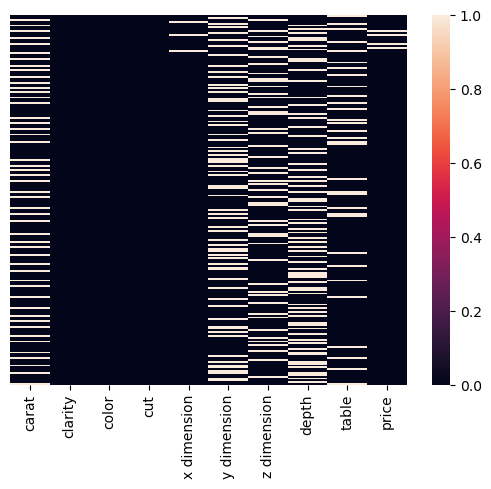

In [54]:
sns.heatmap(df.isnull(), yticklabels=False)

# Jak widać dane są "szczerbate" głównie w działach "X, Y, Z, dimensions" oraz" "Depth" i "Table"

In [55]:
dfTest = df.interpolate()
dfTest

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.10,5.150000,3.200,61.50,NaN,3000.0
1,0.70,VVS2,E,Premium,5.70,4.730000,3.520,62.00,59,4500.0
2,0.95,SI2,H,Good,4.30,4.310000,3.860,62.30,56,700.0
3,1.20,IF,D,Ideal,5.15,6.820000,4.200,61.70,58,10000.0
4,0.90,I1,J,Fair,6.00,6.370000,3.700,61.70,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,SI1,F,Very Good,4.90,4.890000,4.115,62.40,59,2300.0
196,1.25,VVS2,H,Good,6.90,5.303333,4.270,62.35,55,10400.0
197,0.55,I1,I,Premium,5.30,5.716667,3.280,62.30,57,150000.0
198,0.85,SI2,E,Fair,6.10,6.130000,3.780,62.40,58,6300.0


<Axes: >

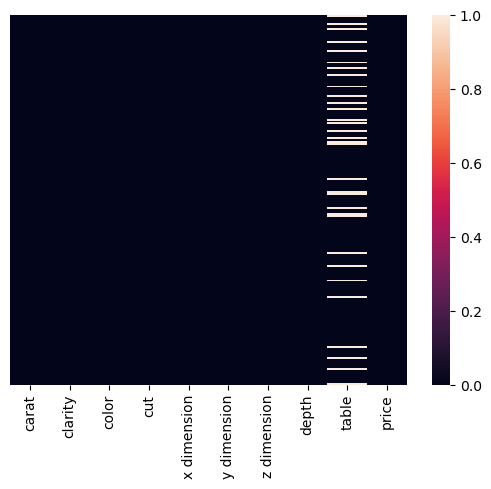

In [56]:
sns.heatmap(dfTest.isnull(), yticklabels=False)

In [57]:
print(df['x dimension'])

0      5.1
1      5.7
2      4.3
3      NaN
4      6.0
      ... 
195    4.9
196    6.9
197    5.3
198    6.1
199    6.4
Name: x dimension, Length: 200, dtype: float64


In [58]:
df.table.unique()

array([nan, '59', '56', '58', '57', ',', '58,', '54', '57,', '60', '55'],
      dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x2205f55c8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205f55dd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205f55c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205f55ed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205f493850>],
 'means': []}

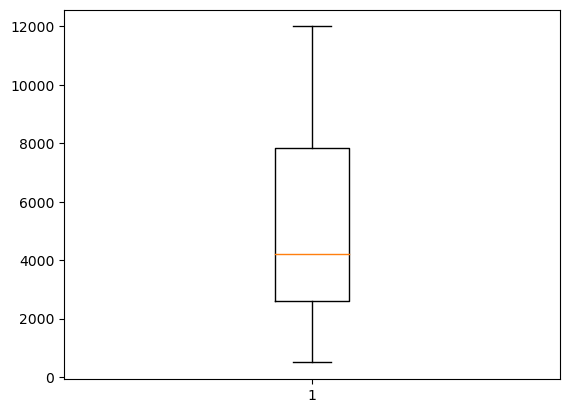

In [59]:
df = df[df.price < 100000]
plt.boxplot(df.price)

In [60]:
df.table.unique()

array([nan, '59', '56', '58', '57', '54', '60', '55'], dtype=object)

In [61]:
df['x dimension'] = df['x dimension'].astype(float)
df['y dimension'] = df['y dimension'].astype(float)
df['z dimension'] = df['z dimension'].astype(float)
df['carat'] = df['carat'].astype(float)
df['depth'] = df['depth'].astype(float)
df['table'] = df['table'].astype(float)
df['price'] = df['price'].astype(float)
df.head(5)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,VVS2,E,Premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,SI2,H,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,IF,D,Ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [62]:
df.interpolate(inplace=True)
df.head(10)

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.10,5.150,3.20,61.5,NaN,3000.0
1,0.70,VVS2,E,Premium,5.70,4.730,3.52,62.0,59.0,4500.0
2,0.95,SI2,H,Good,4.30,4.310,3.86,62.3,56.0,700.0
3,1.20,IF,D,Ideal,5.15,6.820,4.20,61.7,58.0,10000.0
4,0.90,I1,J,Fair,6.00,6.370,3.70,61.7,57.5,2400.0
5,0.70,SI1,G,Very Good,5.90,5.920,3.63,61.6,57.0,4200.0
6,0.50,IF,D,Ideal,5.10,5.355,3.20,61.5,57.0,3100.0
7,0.40,VVS1,F,Good,4.80,4.790,2.95,61.4,57.5,1500.0
9,1.00,VVS1,F,Ideal,6.40,4.835,4.00,61.3,58.0,7500.0
11,0.40,VVS2,G,Very Good,4.90,4.880,3.77,61.2,56.0,1400.0


In [63]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.70,VVS2,E,Premium,5.70,4.73,3.520,62.000000,59.0,4500.0
1,0.95,SI2,H,Good,4.30,4.31,3.860,62.300000,56.0,700.0
2,1.20,IF,D,Ideal,5.15,6.82,4.200,61.700000,58.0,10000.0
3,0.90,I1,J,Fair,6.00,6.37,3.700,61.700000,57.5,2400.0
4,0.70,SI1,G,Very Good,5.90,5.92,3.630,61.600000,57.0,4200.0
...,...,...,...,...,...,...,...,...,...,...
185,0.95,SI1,G,Ideal,6.40,6.42,3.960,62.300000,56.0,7100.0
186,0.45,SI1,F,Very Good,4.90,4.89,4.115,62.400000,59.0,2300.0
187,1.25,VVS2,H,Good,6.90,5.51,4.270,62.433333,55.0,10400.0
188,0.85,SI2,E,Fair,6.10,6.13,3.780,62.466667,58.0,6300.0


In [64]:
X = df.iloc[:, [4,5,6]]
y=df.iloc[:,7]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=50)
scaler = MinMaxScaler().fit(X_train)


In [66]:
X_train.describe()

,x dimension,y dimension,z dimension
count,142.000000,142.000000,142.000000
mean,5.927817,5.852541,3.726467
std,0.729824,0.677603,0.408755
min,4.400000,4.410000,2.620000
25%,5.400000,5.391667,3.472500
50%,5.900000,5.850000,3.777500
75%,6.575000,6.377500,4.040000
max,7.300000,7.280000,4.500000


<Axes: >

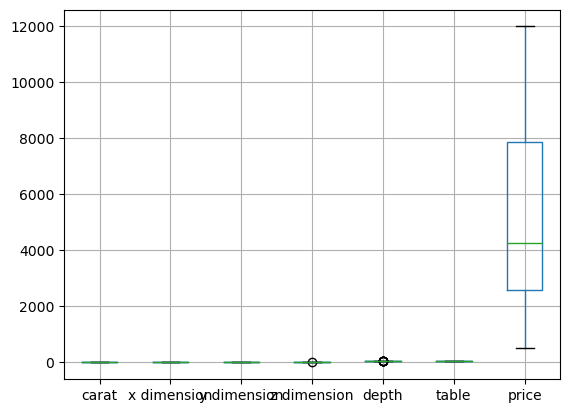

In [70]:
df.boxplot()

<Axes: >

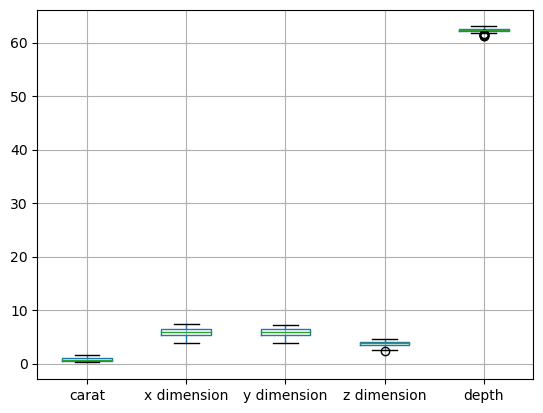

In [36]:
df.boxplot(['carat','x dimension', 'y dimension', 'z dimension', 'depth'])

<Axes: >

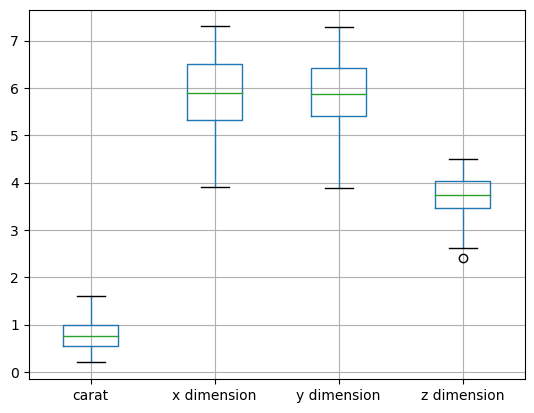

In [71]:
df.boxplot(['carat','x dimension', 'y dimension', 'z dimension'])

In [72]:
X = sm.add_constant(df['x dimension'])
y = df['price']
print(X.head())
print()
print(y.head())

   const  x dimension
0    1.0         5.70
1    1.0         4.30
2    1.0         5.15
3    1.0         6.00
4    1.0         5.90

0     4500.0
1      700.0
2    10000.0
3     2400.0
4     4200.0
Name: price, dtype: float64


In [73]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     747.2
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           2.09e-67
Time:                        20:57:44   Log-Likelihood:                -1645.7
No. Observations:                 190   AIC:                             3295.
Df Residuals:                     188   BIC:                             3302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.654e+04    804.954    -20.553      0.000   -1.81e+04    -1.5e+04
x dimension  3704.7783    135.534     27.335      0.000    3437.415    3972.142
==============================================================================
Omnibus:                       39.012   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.336
Skew:                          -0.335   Prob(JB):                     1.14e-77
Kurtosis:                       9.656   Cond. No.                         48.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm_fit.params

const         -16544.439978
x dimension     3704.778305
dtype: float64

Text(0, 0.5, 'price')

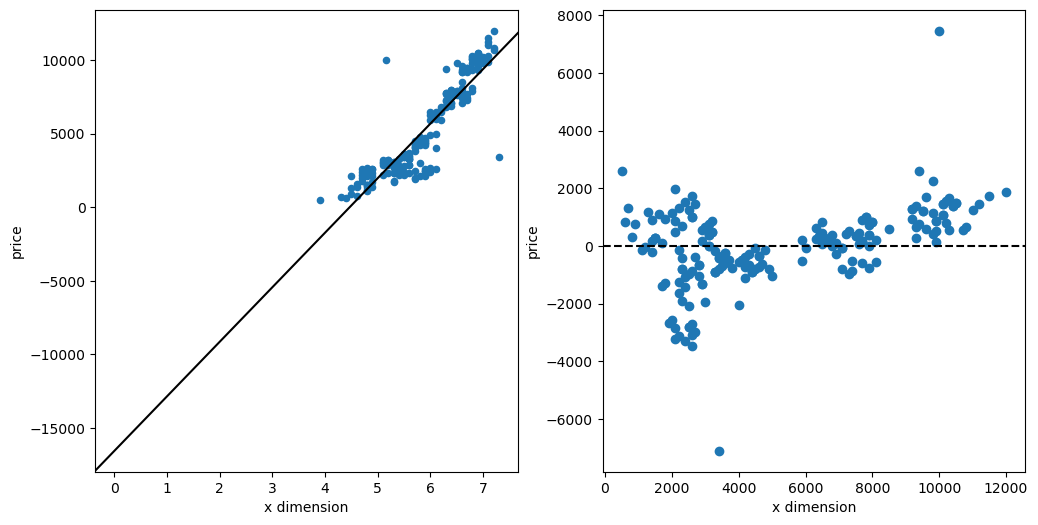

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='price', x='x dimension', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.price, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('x dimension')
ax2.set_ylabel('price')

<Axes: >

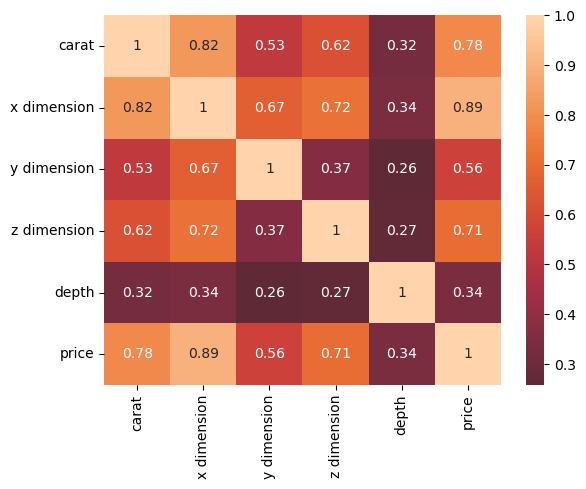

In [77]:
sns.heatmap(df[["carat", "x dimension", "y dimension", "z dimension", "depth", 'price']].corr(), annot=True, center=0.0)

# Jak widać na wyżej załączonej heatmapie, na cene najbardziej wpływa "x dimension", następne w kolejności są karaty a po nich wymiary: z oraz y a na ostatnim miejscu pojawia się depth